In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# A CNN on dataset provided by tensor flow itself - CIFAR10
# 10 stands for the no. of classes in the dataset

'''
link for dataset:-

https://www.cs.toronto.edu/~kriz/cifar.html

'''

In [11]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print(X_train.shape)
#(no_of_images, height, width, rgb)
print(X_test.shape)
#(no_of_images, height, width, rgb)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [20]:
y_train[:7] #just checking randomly how the data set id classified

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2]], dtype=uint8)

In the above output the number respresent a class according to the order mentioned in the CIFAR10 site.
E.g.
0 -> airplane,
6 -> frog etc.

In [21]:
#since y_train a 2d array we need a flattened array
y_train = y_train.reshape(-1,)
y_train[:7]

array([6, 9, 9, 4, 1, 1, 2], dtype=uint8)

In [25]:
#these are labels and are created in the same order as mentioned in the cifar10 site
classes = ["airplane", "automoblile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [23]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index]) # a 3d array only for a single image
  plt.xlabel(classes[y[index]])

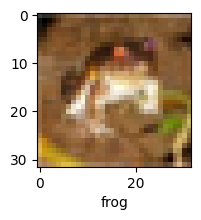

In [26]:
plot_sample(X_train, y_train, 0)

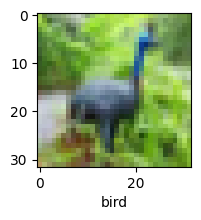

In [27]:
plot_sample(X_train, y_train, 6)

In [16]:
print(X_train[4])

[[[170 180 198]
  [168 178 196]
  [177 185 203]
  ...
  [162 179 215]
  [158 178 214]
  [157 177 212]]

 [[168 181 198]
  [172 185 201]
  [171 183 200]
  ...
  [159 177 212]
  [156 176 211]
  [154 174 209]]

 [[154 170 186]
  [149 165 181]
  [129 144 162]
  ...
  [161 178 214]
  [157 177 212]
  [154 174 209]]

 ...

 [[ 74  84  80]
  [ 76  85  81]
  [ 78  85  82]
  ...
  [ 71  75  78]
  [ 68  72  75]
  [ 61  65  68]]

 [[ 68  76  77]
  [ 69  77  78]
  [ 72  79  78]
  ...
  [ 76  80  83]
  [ 71  75  78]
  [ 71  75  78]]

 [[ 67  75  78]
  [ 68  76  79]
  [ 69  75  76]
  ...
  [ 75  79  82]
  [ 71  75  78]
  [ 73  77  80]]]


In [29]:
#normalizing the data
X_train = X_train / 255
X_test = X_test / 255


In [31]:
# applying normal Neural Network ANN
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),# flattening the 2D array to 1D
    layers.Dense(3000, activation='relu'), # first hidden layer of 3000 neurons
    layers.Dense(1000,activation='relu'),# second hidden layer of 1000 neurons
    layers.Dense(10, activation='sigmoid') # last/output layer with 10 neurons each for a class
])

ann.compile(optimizer='SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 128s 82ms/step - loss: 1.8115 - accuracy: 0.3546
Epoch 2/5
1563/1563 [==============================] - 126s 81ms/step - loss: 1.6232 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 154s 98ms/step - loss: 1.5415 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 127s 81ms/step - loss: 1.4822 - accuracy: 0.4804
Epoch 5/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.4321 - accuracy: 0.4970


In [32]:
ann.evaluate(X_test, y_test) #evaluating on the test dataset the trained model

313/313 [==============================] - 8s 27ms/step - loss: 1.4714 - accuracy: 0.4754


[1.4713566303253174, 0.47540000081062317]

see how less is the accuracy

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 [==============================] - 8s 27ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.50      0.55      1000
           1       0.41      0.82      0.55      1000
           2       0.49      0.17      0.25      1000
           3       0.41      0.26      0.32      1000
           4       0.43      0.41      0.42      1000
           5       0.49      0.27      0.35      1000
           6       0.44      0.69      0.54      1000
           7       0.45      0.66      0.54      1000
           8       0.56      0.66      0.60      1000
           9       0.64      0.31      0.42      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.45     10000
weighted avg       0.49      0.48      0.45     10000



for each class the precision and other estiomating factors are shown. Also,
quite low accuracy, LOL for ANN :)